In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import dataframe_image as dfi

# Cálculo alternativo del umbral para ser elegible en el CPO

En esta ocasión realizamos el análisis de sesgo, pero con los datos de participación provistos en el BIT-IFT y consultados el 1 de septiembre de 2021.

Se parte de la participación por servicio de telecomunicaciones (un umbral para cada servicio).
Se eliminan de la lista de elegibles en cualquier servicio aquellos grupos económicos que tengan una participación que rebase el umbral deerminado en alguno de los mercados de telecomunicaciones.

In [58]:
tmovil = pd.read_csv("particip_líneas_tmovil.csv", encoding = "Latin1")
tfija = pd.read_csv("particip_líneas_tfija.csv", encoding = "Latin1")
imovil = pd.read_csv("particip_accesos_imóvil.csv", encoding = "Latin1")
ifijo = pd.read_csv("particip_accesos_ifijo.csv", encoding = "Latin1")
tvres = pd.read_csv("particip_accesos_tvres.csv", encoding = "Latin1")

### Los conjuntos de datos correspondientes a telefonía móvil (tmovil), accesos de Internet fijo (ifijo) y accesos de Internet móvil (imovil) no sufren transformación alguna. Practicamente están agregadas en el BIT-IFT y únicamente se calcula la participación con respecto al total de líneas o accesos registrados al cierre de 2021.

### En cuanto a los conjuntos de datos de televisión restringida (tvres) y telefonía fija (tfija), los datos están desagregados por entidad federal, por lo que se deben agrupar y sumar las líneas de cada empresa registrada en el mismo periodo reportado (diciembre de 2021).

In [59]:
tfija.head(100)

,FOLIO,CONCESIONARIO,K_EMPRESA,EMPRESA,K_ENTIDAD,FECHA,L_TOTAL_E,ANIO,MES,K_GRUPO,GRUPO,ENTIDAD
0,100418,"MEGA CABLE, S.A. DE C.V.",C0378,MEGACABLE,1,15DEC2021,0.0,2021,12,G008,MEGACABLE-MCM,Aguascalientes
1,100418,"MEGA CABLE, S.A. DE C.V.",C0378,MEGACABLE,2,15DEC2021,2469.0,2021,12,G008,MEGACABLE-MCM,Baja California
2,100418,"MEGA CABLE, S.A. DE C.V.",C0378,MEGACABLE,3,15DEC2021,49774.0,2021,12,G008,MEGACABLE-MCM,Baja California Sur
3,100418,"MEGA CABLE, S.A. DE C.V.",C0378,MEGACABLE,4,15DEC2021,2736.0,2021,12,G008,MEGACABLE-MCM,Campeche
4,100418,"MEGA CABLE, S.A. DE C.V.",C0378,MEGACABLE,5,15DEC2021,92924.0,2021,12,G008,MEGACABLE-MCM,Coahuila de Zaragoza
...,...,...,...,...,...,...,...,...,...,...,...,...
95,100647,"OPERBES, S.A. DE C.V.",C0415,BESTEL,14,15DEC2021,121520.0,2021,12,G004,GRUPO TELEVISA,Jalisco
96,100647,"OPERBES, S.A. DE C.V.",C0415,BESTEL,15,15DEC2021,8726.0,2021,12,G004,GRUPO TELEVISA,Mexico.
97,100647,"OPERBES, S.A. DE C.V.",C0415,BESTEL,16,15DEC2021,7489.0,2021,12,G004,GRUPO TELEVISA,Michoacan de Ocampo
98,100647,"OPERBES, S.A. DE C.V.",C0415,BESTEL,17,15DEC2021,17414.0,2021,12,G004,GRUPO TELEVISA,Morelos


In [25]:
tvres.head(5)

,FOLIO,ANIO,MES,FECHA,K_GRUPO,GRUPO,CONCESIONARIO,K_EMPRESA,EMPRESA,ENTIDAD,TECNO_ACCESO_TV,A_TOTAL_E
0,100028,2021,12,44545,G004,GRUPO TELEVISA,ADOLFO MERINO MEDINA,C008,CABLEMAS,Sin información de Entidad,Sin información de tecnología,42
1,100029,2021,12,44545,C009,AGUSTIN PEREZ VIEYRA,AGUSTIN PEREZ VIEYRA,C000,AGUSTIN PEREZ VIEYRA,Sin información de Entidad,Sin información de tecnología,1182
2,100105,2021,12,44545,C140,DANIEL GARCIA GODINEZ,DANIEL GARCIA GODINEZ,C014,DANIEL GARCIA GODINEZ,Sin información de Entidad,Sin información de tecnología,844
3,100147,2021,12,44545,C199,GABRIEL BUTRON CHIAPA,GABRIEL BUTRON CHIAPA,C019,GABRIEL BUTRON CHIAPA,Sin información de Entidad,Sin información de tecnología,0
4,100149,2021,12,44545,C204,GENY MARGARITA MOGUEL REJON,GENY MARGARITA MOGUEL REJON,C020,GENY MARGARITA MOGUEL REJON,Sin información de Entidad,Sin información de tecnología,2058


# Telefonía Fija

In [65]:
# Agrupando las líneas totales fijas al cierre de 2021 por grupo de interés.

telefonía_fija = tfija[['GRUPO', 'L_TOTAL_E']].groupby(by=['GRUPO'], dropna=True).sum().sort_values(by=['L_TOTAL_E'],ascending=False)
telefonía_fija


,L_TOTAL_E
GRUPO,
AMÉRICA MÓVIL,10804136.0
GRUPO TELEVISA,6271138.0
TOTALPLAY,3811604.0
MEGACABLE-MCM,3359434.0
MARCATEL,62406.0
TOKA MOVIL,17802.0
MAXCOM,10966.0
IENTC,2621.0
DISH-MVS,816.0


In [71]:
# Obtenemos la participación de mercado, basada en el número de líneas registradas en el BIT para el cierre de 2021

total_líneas_fijas = sum(telefonía_fija['L_TOTAL_E'])

participación = []

for i in telefonía_fija['L_TOTAL_E']:
    participación.append(i/total_líneas_fijas*100)

telefonía_fija['Participación'] = participación

In [72]:
telefonía_fija

,L_TOTAL_E,Participación
GRUPO,,
AMÉRICA MÓVIL,10804136.0,44.386704
GRUPO TELEVISA,6271138.0,25.763758
TOTALPLAY,3811604.0,15.659238
MEGACABLE-MCM,3359434.0,13.801585
MARCATEL,62406.0,0.256383
TOKA MOVIL,17802.0,0.073136
MAXCOM,10966.0,0.045052
IENTC,2621.0,0.010768
DISH-MVS,816.0,0.003352


In [76]:
# con cinco operadores que no reportan líneas y que se eliminan para efectos del ejercicio
telefonía_fija[telefonía_fija['L_TOTAL_E']==0]

,L_TOTAL_E,Participación
GRUPO,,
BT LATAM MEXICO,0.0,0.0
C3NTRO TELECOM,0.0,0.0
CIERTO,0.0,0.0
TRANSTELCO,0.0,0.0
VADSA,0.0,0.0


In [78]:
# len(telefonía_fija['L_TOTAL_E']) # Dejando un total de 10 operadores que registran participación en el mercado de acuerdo con la información en el BIT

telefonía_fija = telefonía_fija[telefonía_fija['L_TOTAL_E']!=0]
telefonía_fija


,L_TOTAL_E,Participación
GRUPO,,
AMÉRICA MÓVIL,10804136.0,44.386704
GRUPO TELEVISA,6271138.0,25.763758
TOTALPLAY,3811604.0,15.659238
MEGACABLE-MCM,3359434.0,13.801585
MARCATEL,62406.0,0.256383
TOKA MOVIL,17802.0,0.073136
MAXCOM,10966.0,0.045052
IENTC,2621.0,0.010768
DISH-MVS,816.0,0.003352


In [79]:
sum(telefonía_fija['Participación'])

100.00000000000001

In [147]:
telefonía_fija.name = "Telefonía Fija"

# Televisión Restringida

In [74]:
# Agrupando los accesos totales a televisión restringida al cierre de 2021 por grupo de interés.

tv_restringida = tvres[['GRUPO', 'A_TOTAL_E']].groupby(by=['GRUPO'], dropna=True).sum().sort_values(by=['A_TOTAL_E'],ascending=False)
tv_restringida


,A_TOTAL_E
GRUPO,
GRUPO TELEVISA,15715831
MEGACABLE-MCM,5749987
TOTALPLAY,2193267
DISH-MVS,1477204
STARGROUP,282056
TELESISTEMAS PENINSULARES,12713
RAVS CABLE,12713
SARA QUIROZ CHAPA,7641
CABLEVISION DE APATZINGA,6849


In [75]:
# Obtenemos la participación de mercado, basada en el número de accesos de TV restringida  registrados en el BIT para el cierre de 2021

total_accesos_tvres = sum(tv_restringida['A_TOTAL_E'])

participación = []

for i in tv_restringida['A_TOTAL_E']:
    participación.append(i/total_accesos_tvres*100)

tv_restringida['Participación'] = participación

tv_restringida

,A_TOTAL_E,Participación
GRUPO,,
GRUPO TELEVISA,15715831,61.543017
MEGACABLE-MCM,5749987,22.516884
TOTALPLAY,2193267,8.588809
DISH-MVS,1477204,5.784714
STARGROUP,282056,1.104528
TELESISTEMAS PENINSULARES,12713,0.049784
RAVS CABLE,12713,0.049784
SARA QUIROZ CHAPA,7641,0.029922
CABLEVISION DE APATZINGA,6849,0.026821


In [81]:
# con dos operadores que no reportan líneas la lista pasa de 60 a 58
# len(tv_restringida["A_TOTAL_E"])

tv_restringida = tv_restringida[tv_restringida['A_TOTAL_E'] != 0]
tv_restringida


,A_TOTAL_E,Participación
GRUPO,,
GRUPO TELEVISA,15715831,61.543017
MEGACABLE-MCM,5749987,22.516884
TOTALPLAY,2193267,8.588809
DISH-MVS,1477204,5.784714
STARGROUP,282056,1.104528
TELESISTEMAS PENINSULARES,12713,0.049784
RAVS CABLE,12713,0.049784
SARA QUIROZ CHAPA,7641,0.029922
CABLEVISION DE APATZINGA,6849,0.026821


In [146]:
tv_restringida.name = "Televisión Restringida"

# Telefonía Móvil

In [87]:
telefonía_móvil = tmovil[['GRUPO', 'L_TOTAL_E']].groupby('GRUPO', dropna=True).sum().sort_values(by='L_TOTAL_E', ascending=False)
# len(telefonía_móvil) # Son 26 operadores

telefonía_móvil

,L_TOTAL_E
GRUPO,
AMÉRICA MÓVIL,79751853
TELEFÓNICA,22953701
AT&T,19995643
FREEDOM,1231734
OUI,617580
MEGACABLE-MCM,424057
FLASH MOBILE,188191
GRUPO TELEVISA,179513
DIRI MOVIL,135781


In [91]:
# calculando la participación por número de líneas de telefonía móvil

total_tmovil = sum(telefonía_móvil['L_TOTAL_E'])
# total_tmovil

participación = []

for i in telefonía_móvil['L_TOTAL_E']:
    participación.append(i/total_tmovil*100)


telefonía_móvil['Participación'] = participación

telefonía_móvil

,L_TOTAL_E,Participación
GRUPO,,
AMÉRICA MÓVIL,79751853,63.383218
TELEFÓNICA,22953701,18.242578
AT&T,19995643,15.891646
FREEDOM,1231734,0.978927
OUI,617580,0.490825
MEGACABLE-MCM,424057,0.337022
FLASH MOBILE,188191,0.149566
GRUPO TELEVISA,179513,0.142669
DIRI MOVIL,135781,0.107913


In [92]:
sum(telefonía_móvil['Participación'])

100.0

In [145]:
telefonía_móvil.name = 'Telefonía Móvil'

# INTERNET FIJO

In [101]:
internet_fijo = ifijo[['GRUPO','A_TOTAL_E']].groupby('GRUPO', dropna=True).sum().sort_values(by='A_TOTAL_E', ascending=False)
#len(internet_fijo['A_TOTAL_E']) # 54 operadores en total, pero 3 en cero
internet_fijo

,A_TOTAL_E
GRUPO,
AMÉRICA MÓVIL,10036609.0
GRUPO TELEVISA,6354500.0
TOTALPLAY,3585894.0
MEGACABLE-MCM,3565634.0
IST,362642.0
DISH-MVS,128877.0
AT&T,37603.0
TELEFÓNICA,14180.0
STARGROUP,8361.0


In [100]:
internet_fijo[internet_fijo['A_TOTAL_E']==0]

,A_TOTAL_E
GRUPO,
GRUPO CONEC TV,0.0
HNS DE MEXICO,0.0
AXTEL,0.0


In [102]:
internet_fijo = internet_fijo[internet_fijo['A_TOTAL_E']!=0]
internet_fijo

,A_TOTAL_E
GRUPO,
AMÉRICA MÓVIL,10036609.0
GRUPO TELEVISA,6354500.0
TOTALPLAY,3585894.0
MEGACABLE-MCM,3565634.0
IST,362642.0
DISH-MVS,128877.0
AT&T,37603.0
TELEFÓNICA,14180.0
STARGROUP,8361.0


In [106]:
# calculando la participación

total_internet_fijo = sum(internet_fijo['A_TOTAL_E'])

participación = []
    
for i in internet_fijo['A_TOTAL_E']:
    participación.append(i/total_internet_fijo*100)

internet_fijo['Participación'] = participación

internet_fijo


<ipython-input-106-59f6b980c1c8>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  internet_fijo['Participación'] = participación


,A_TOTAL_E,Participación
GRUPO,,
AMÉRICA MÓVIL,10036609.0,41.561523
GRUPO TELEVISA,6354500.0,26.313937
TOTALPLAY,3585894.0,14.849160
MEGACABLE-MCM,3565634.0,14.765264
IST,362642.0,1.501698
DISH-MVS,128877.0,0.533679
AT&T,37603.0,0.155714
TELEFÓNICA,14180.0,0.058719
STARGROUP,8361.0,0.034623


In [149]:
internet_fijo.name = "Internet Fijo"

# INTERNET MÓVIL

In [114]:
internet_móvil = imovil[['GRUPO', 'L_TOTAL_E']].groupby('GRUPO', dropna=True).sum().sort_values(by='L_TOTAL_E', ascending=False)
# len(internet_móvil) # Se trata de 23 operadores, de los cuales 2 presentan líneas en cero.
internet_móvil

,L_TOTAL_E
GRUPO,
AMÉRICA MÓVIL,76801010
AT&T,19128540
TELEFÓNICA,10489770
FREEDOMPOP,1231734
OUI,617580
FLASH MOBILE,188191
TELMOVIL,112503
YOBI TELECOM,86457
WEEX,53277


In [115]:
internet_móvil[internet_móvil['L_TOTAL_E']==0]

,L_TOTAL_E
GRUPO,
MEGACABLE-MCM,0
BROMOVIL,0


In [116]:
internet_móvil = internet_móvil[internet_móvil['L_TOTAL_E']!=0]

In [120]:
# calculando las participaciones
total_internet_móvil = sum(internet_móvil['L_TOTAL_E'])
participación = []

for i in internet_móvil['L_TOTAL_E']:
    participación.append(i/total_internet_móvil*100)

internet_móvil['Participación'] = participación

internet_móvil

<ipython-input-120-4d13663c8bd5>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  internet_móvil['Participación'] = participación


,L_TOTAL_E,Participación
GRUPO,,
AMÉRICA MÓVIL,76801010,70.565865
AT&T,19128540,17.575576
TELEFÓNICA,10489770,9.638151
FREEDOMPOP,1231734,1.131735
OUI,617580,0.567441
FLASH MOBILE,188191,0.172913
TELMOVIL,112503,0.103369
YOBI TELECOM,86457,0.079438
WEEX,53277,0.048952


In [121]:
sum(internet_móvil['Participación'])

100.00000000000003

In [151]:
internet_móvil.name = "Internet Móvil"

# Análisis de sesgo para cada participación obtenida:

## Análisis gráfico de las distribuciones

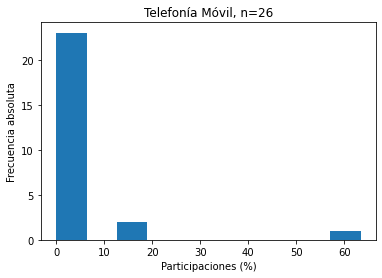

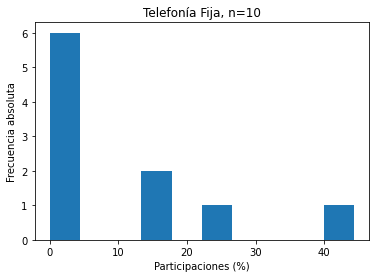

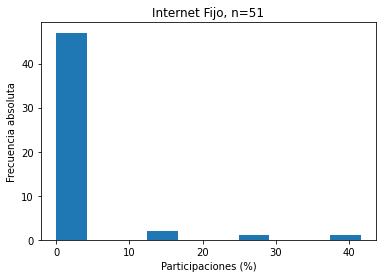

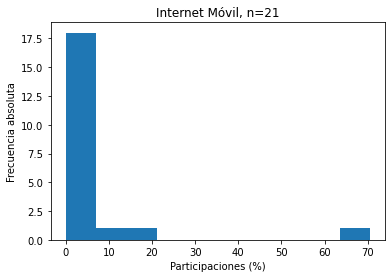

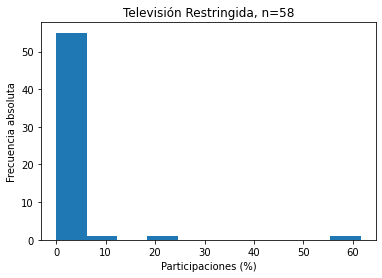

In [152]:
conjunto_de_datos = [telefonía_móvil, telefonía_fija, internet_fijo, internet_móvil, tv_restringida]

for i in conjunto_de_datos:
    plt.hist(i['Participación'])
    plt.xlabel('Participaciones (%)')
    plt.ylabel('Frecuencia absoluta')
    plt.title(f'{i.name}, n={len(i)}')
    plt.show()

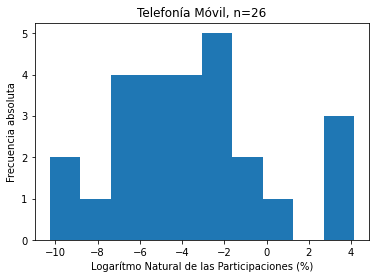

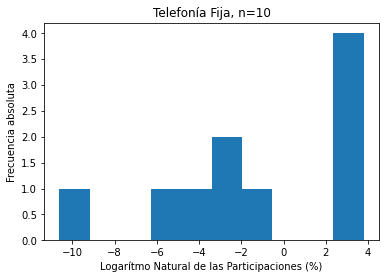

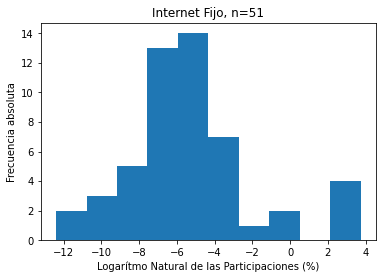

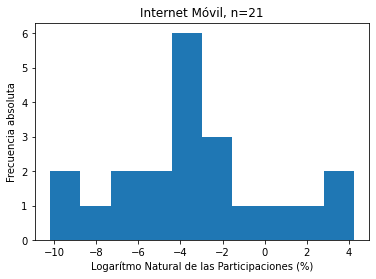

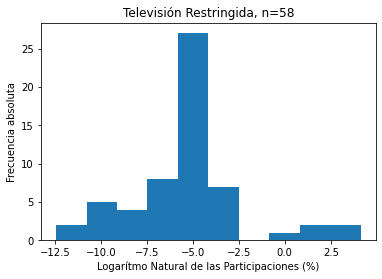

In [153]:
conjunto_de_datos = [telefonía_móvil, telefonía_fija, internet_fijo, internet_móvil, tv_restringida]

for i in conjunto_de_datos:
    plt.hist(np.log(i['Participación']))
    plt.xlabel('Logarítmo Natural de las Participaciones (%)')
    plt.ylabel('Frecuencia absoluta')
    plt.title(f'{i.name}, n={len(i)}')
    plt.show()

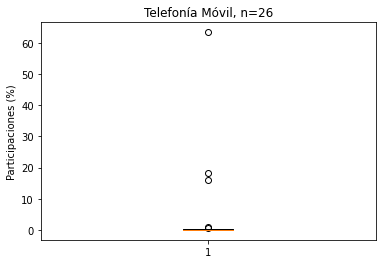

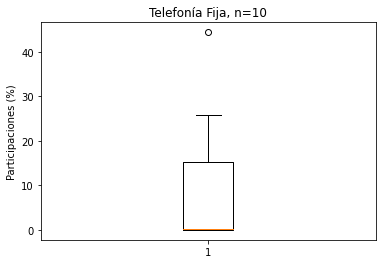

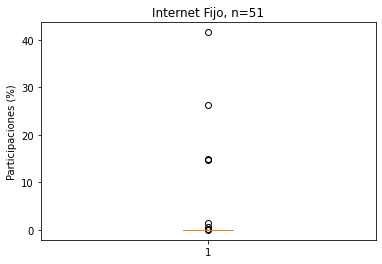

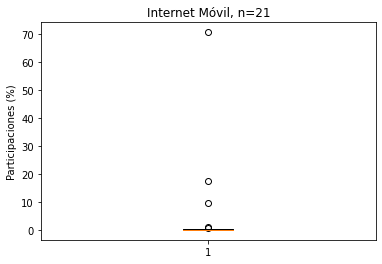

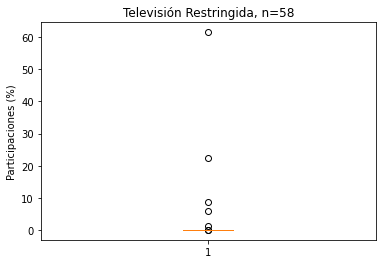

In [156]:
# Boxplot-Prueba de outliers (los grandes operadores)
for i in conjunto_de_datos:
    fig1, ax1 = plt.subplots()
    ax1.set_title(f'{i.name}, n={len(i)}')
    ax1.set_ylabel('Participaciones (%)')
    ax1.boxplot(i['Participación'])
    plt.show()

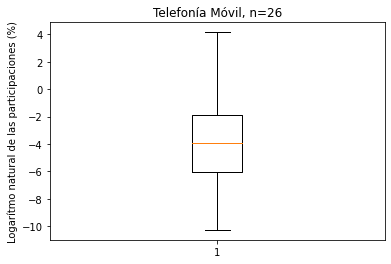

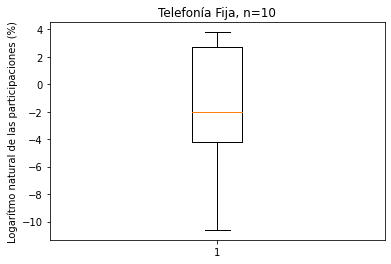

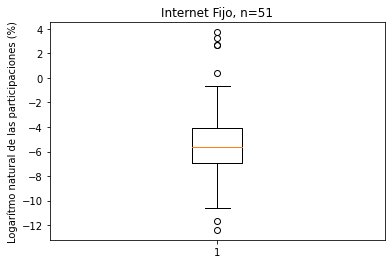

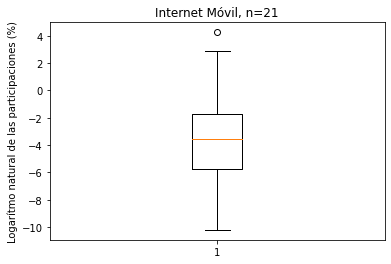

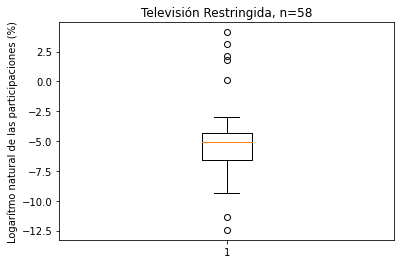

In [160]:
# Boxplot-Prueba de outliers (los grandes operadores)
for i in conjunto_de_datos:
    fig1, ax1 = plt.subplots()
    ax1.set_title(f'{i.name}, n={len(i)}')
    ax1.set_ylabel('Logarítmo natural de las participaciones (%)')
    ax1.boxplot(np.log(i['Participación']))
    plt.show()
                

## Análisis intercuartílico

### Telefonía Móvil

In [171]:
# Análisis con quartiles y rango intercuantil para efectos de identificar los outliers

quartiles = telefonía_móvil['Participación'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"El cuartil más bajo de las participaciones: {lowerq}")
print(f"El cuartil más alto: {upperq}")
print(f"El rango intercuantil: {iqr}")
print(f"La participación media es: {quartiles[0.5]} ")


lower_bound = lowerq - (1*iqr)
upper_bound = upperq + (1*iqr)
print(f"Valores por debajo {lower_bound} se consideran datos aberrantes.")
print(f"Valores por encima {upper_bound} se consideran datos aberrantes que no son elegibles para el Comité de Pequeños Operadores.")



El cuartil más bajo de las participaciones: 0.0027419062266163083
El cuartil más alto: 0.14784159685058132
El rango intercuantil: 0.14509969062396502
La participación media es: 0.02045104405113164 
Valores por debajo -0.14235778439734872 se consideran datos aberrantes.
Valores por encima 0.29294128747454634 se consideran datos aberrantes que no son elegibles para el Comité de Pequeños Operadores.


In [174]:
# el umbral es que para un pequeño operador iniciará en 0.29% de participación (suena poco atractivo si consideramos que la OMC está cuestionando la competencia en el sector)

elegibles_tmovil = telefonía_móvil[telefonía_móvil['Participación']<=0.29294128747454634].sort_values(by=['Participación'], ascending=False)
elegibles_tmovil

,L_TOTAL_E,Participación
GRUPO,,
FLASH MOBILE,188191,0.149566
GRUPO TELEVISA,179513,0.142669
DIRI MOVIL,135781,0.107913
TELMOVIL,112503,0.089412
WEEX,89039,0.070764
SIMPATI,31799,0.025272
MARKETING 358,31736,0.025222
YOBI TELECOM,19729,0.015680
WIMOTELECOM,16004,0.012719


In [175]:
no_elegibles_tmovil = telefonía_móvil[telefonía_móvil['Participación']>0.29294128747454634].sort_values(by=['Participación'], ascending=False)
no_elegibles_tmovil

,L_TOTAL_E,Participación
GRUPO,,
AMÉRICA MÓVIL,79751853,63.383218
TELEFÓNICA,22953701,18.242578
AT&T,19995643,15.891646
FREEDOM,1231734,0.978927
OUI,617580,0.490825
MEGACABLE-MCM,424057,0.337022


# Telefonía Fija

In [176]:
# Análisis con quartiles y rango intercuantil para efectos de identificar los outliers

quartiles = telefonía_fija['Participación'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"El cuartil más bajo de las participaciones: {lowerq}")
print(f"El cuartil más alto: {upperq}")
print(f"El rango intercuantil: {iqr}")
print(f"La participación media es: {quartiles[0.5]} ")


lower_bound = lowerq - (1*iqr)
upper_bound = upperq + (1*iqr)
print(f"Valores por debajo {lower_bound} se consideran datos aberrantes.")
print(f"Valores por encima {upper_bound} se consideran datos aberrantes que no son elegibles para el Comité de Pequeños Operadores.")



El cuartil más bajo de las participaciones: 0.019338826385796534
El cuartil más alto: 15.194824733271275
El rango intercuantil: 15.175485906885479
La participación media es: 0.1647595291042507 
Valores por debajo -15.156147080499682 se consideran datos aberrantes.
Valores por encima 30.370310640156752 se consideran datos aberrantes que no son elegibles para el Comité de Pequeños Operadores.


In [177]:
# el umbral es que para un pequeño operador iniciará en 30.3% de participación (suena poco atractivo si consideramos que la OMC está cuestionando la competencia en el sector)

elegibles_tfija = telefonía_fija[telefonía_fija['Participación']<=30.370310640156752].sort_values(by=['Participación'], ascending=False)
elegibles_tfija

,L_TOTAL_E,Participación
GRUPO,,
GRUPO TELEVISA,6271138.0,25.763758
TOTALPLAY,3811604.0,15.659238
MEGACABLE-MCM,3359434.0,13.801585
MARCATEL,62406.0,0.256383
TOKA MOVIL,17802.0,0.073136
MAXCOM,10966.0,0.045052
IENTC,2621.0,0.010768
DISH-MVS,816.0,0.003352
COMNET,6.0,0.000025


In [178]:
no_elegibles_tfija = telefonía_fija[telefonía_fija['Participación']>30.370310640156752].sort_values(by=['Participación'], ascending=False)
no_elegibles_tfija

,L_TOTAL_E,Participación
GRUPO,,
AMÉRICA MÓVIL,10804136.0,44.386704


# Internet Fijo

In [179]:
# Análisis con quartiles y rango intercuantil para efectos de identificar los outliers

quartiles = internet_fijo['Participación'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"El cuartil más bajo de las participaciones: {lowerq}")
print(f"El cuartil más alto: {upperq}")
print(f"El rango intercuantil: {iqr}")
print(f"La participación media es: {quartiles[0.5]} ")


lower_bound = lowerq - (1*iqr)
upper_bound = upperq + (1*iqr)
print(f"Valores por debajo {lower_bound} se consideran datos aberrantes.")
print(f"Valores por encima {upper_bound} se consideran datos aberrantes que no son elegibles para el Comité de Pequeños Operadores.")



El cuartil más bajo de las participaciones: 0.0009441462929835024
El cuartil más alto: 0.017379745577419996
El rango intercuantil: 0.016435599284436494
La participación media es: 0.0035405485986881335 
Valores por debajo -0.015491452991452992 se consideran datos aberrantes.
Valores por encima 0.033815344861856486 se consideran datos aberrantes que no son elegibles para el Comité de Pequeños Operadores.


In [180]:
# el umbral es que para un pequeño operador iniciará en 0.0338% de participación (suena poco atractivo si consideramos que la OMC está cuestionando la competencia en el sector)

elegibles_ifijo = internet_fijo[internet_fijo['Participación']<=0.033815344861856486].sort_values(by=['Participación'], ascending=False)
elegibles_ifijo

,A_TOTAL_E,Participación
GRUPO,,
IENTC,6776.0,0.028059
AIRECABLE,4594.0,0.019024
LINK TE CONECTAMOS,4257.0,0.017628
TELESISTEMAS PENINSULARES,4197.0,0.017380
VASANTA,4197.0,0.017380
SARA QUIROZ CHAPA,3087.0,0.012783
MUCHOS MEGAS,3000.0,0.012423
MARCO ANTONIO ROSALES HERRERA,2967.0,0.012286
TELECABLE MERIDA,2137.0,0.008849


In [181]:
no_elegibles_ifijo = internet_fijo[internet_fijo['Participación']>0.033815344861856486].sort_values(by=['Participación'], ascending=False)
no_elegibles_ifijo

,A_TOTAL_E,Participación
GRUPO,,
AMÉRICA MÓVIL,10036609.0,41.561523
GRUPO TELEVISA,6354500.0,26.313937
TOTALPLAY,3585894.0,14.849160
MEGACABLE-MCM,3565634.0,14.765264
IST,362642.0,1.501698
DISH-MVS,128877.0,0.533679
AT&T,37603.0,0.155714
TELEFÓNICA,14180.0,0.058719
STARGROUP,8361.0,0.034623


# Internet Móvil

In [182]:
# Análisis con quartiles y rango intercuantil para efectos de identificar los outliers

quartiles = internet_móvil['Participación'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"El cuartil más bajo de las participaciones: {lowerq}")
print(f"El cuartil más alto: {upperq}")
print(f"El rango intercuantil: {iqr}")
print(f"La participación media es: {quartiles[0.5]} ")


lower_bound = lowerq - (1*iqr)
upper_bound = upperq + (1*iqr)
print(f"Valores por debajo {lower_bound} se consideran datos aberrantes.")
print(f"Valores por encima {upper_bound} se consideran datos aberrantes que no son elegibles para el Comité de Pequeños Operadores.")



El cuartil más bajo de las participaciones: 0.0032222817021755005
El cuartil más alto: 0.17291257935959783
El rango intercuantil: 0.16969029765742233
La participación media es: 0.029174191219696746 
Valores por debajo -0.16646801595524682 se consideran datos aberrantes.
Valores por encima 0.3426028770170202 se consideran datos aberrantes que no son elegibles para el Comité de Pequeños Operadores.


In [184]:
# el umbral es que para un pequeño operador iniciará en 0.34% de participación (suena poco atractivo si consideramos que la OMC está cuestionando la competencia en el sector)

elegibles_imovil = internet_móvil[internet_móvil['Participación']<= 0.3426028770170202].sort_values(by=['Participación'], ascending=False)
elegibles_imovil

,L_TOTAL_E,Participación
GRUPO,,
FLASH MOBILE,188191,0.172913
TELMOVIL,112503,0.103369
YOBI TELECOM,86457,0.079438
WEEX,53277,0.048952
SIMPATI,31799,0.029217
MARKETING 358,31752,0.029174
BUENO CELL,20305,0.018657
WIMOTELECOM,15071,0.013847
VASANTA,13187,0.012116


In [185]:
no_elegibles_imovil = internet_móvil[internet_móvil['Participación']> 0.3426028770170202].sort_values(by=['Participación'], ascending=False)
no_elegibles_imovil

,L_TOTAL_E,Participación
GRUPO,,
AMÉRICA MÓVIL,76801010,70.565865
AT&T,19128540,17.575576
TELEFÓNICA,10489770,9.638151
FREEDOMPOP,1231734,1.131735
OUI,617580,0.567441


# Televisión Restringida

In [186]:
# Análisis con quartiles y rango intercuantil para efectos de identificar los outliers

quartiles = tv_restringida['Participación'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"El cuartil más bajo de las participaciones: {lowerq}")
print(f"El cuartil más alto: {upperq}")
print(f"El rango intercuantil: {iqr}")
print(f"La participación media es: {quartiles[0.5]} ")


lower_bound = lowerq - (1*iqr)
upper_bound = upperq + (1*iqr)
print(f"Valores por debajo {lower_bound} se consideran datos aberrantes.")
print(f"Valores por encima {upper_bound} se consideran datos aberrantes que no son elegibles para el Comité de Pequeños Operadores.")



El cuartil más bajo de las participaciones: 0.0014087769446946869
El cuartil más alto: 0.013429883340737817
El rango intercuantil: 0.012021106396043129
La participación media es: 0.006024748657158515 
Valores por debajo -0.010612329451348441 se consideran datos aberrantes.
Valores por encima 0.025450989736780946 se consideran datos aberrantes que no son elegibles para el Comité de Pequeños Operadores.


In [187]:
# el umbral es que para un pequeño operador iniciará en 0.025% de participación (suena poco atractivo si consideramos que la OMC está cuestionando la competencia en el sector)

elegibles_tvres = tv_restringida[tv_restringida['Participación']<= 0.025450989736780946].sort_values(by=['Participación'], ascending=False)
elegibles_tvres

,A_TOTAL_E,Participación
GRUPO,,
TELECABLE MERIDA,6250,0.024475
SISCAB DE MEXICO,5088,0.019925
TV OJO CALIENTE,3800,0.014881
TELECABLE DE RIOVERDE,3749,0.014681
ESPID,3500,0.013706
AIRECABLE,3218,0.012602
CABLEPLAY,3200,0.012531
COSMORED PUERTO VALLARTA,3061,0.011987
TELESISTEMAS POTOSINOS,2986,0.011693


In [188]:
no_elegibles_tvres = tv_restringida[tv_restringida['Participación']> 0.025450989736780946].sort_values(by=['Participación'], ascending=False)
no_elegibles_tvres

,A_TOTAL_E,Participación
GRUPO,,
GRUPO TELEVISA,15715831,61.543017
MEGACABLE-MCM,5749987,22.516884
TOTALPLAY,2193267,8.588809
DISH-MVS,1477204,5.784714
STARGROUP,282056,1.104528
TELESISTEMAS PENINSULARES,12713,0.049784
RAVS CABLE,12713,0.049784
SARA QUIROZ CHAPA,7641,0.029922
CABLEVISION DE APATZINGA,6849,0.026821


# Nos resta controlar a los  grupos que sean no elegibles en algún mercado para efectos de excluirlo en todos los otros mercados.

In [201]:
no_elegibles_ifijo = no_elegibles_ifijo.reset_index()
no_elegibles_imovil= no_elegibles_imovil.reset_index()
no_elegibles_tfija = no_elegibles_tfija.reset_index() 
no_elegibles_tmovil = no_elegibles_tmovil.reset_index()
no_elegibles_tvres = no_elegibles_tvres.reset_index()
    

In [206]:
list_no_elegibles = [no_elegibles_ifijo, no_elegibles_imovil, no_elegibles_tfija, no_elegibles_tmovil, no_elegibles_tvres]

black_list = pd.concat(list_no_elegibles, axis=0)
black_list['GRUPO'].unique()

array(['AMÉRICA MÓVIL', 'GRUPO TELEVISA', 'TOTALPLAY', 'MEGACABLE-MCM',
       'IST', 'DISH-MVS', 'AT&T', 'TELEFÓNICA', 'STARGROUP', 'FREEDOMPOP',
       'OUI', 'FREEDOM', 'TELESISTEMAS PENINSULARES', 'RAVS CABLE',
       'SARA QUIROZ CHAPA', 'CABLEVISION DE APATZINGA',
       'TELECABLE DE CAMPECHE'], dtype=object)